In [1]:
import matplotlib.pyplot as plt
import numpy as np

Some Greyscale conversion functions...I may not need all of them

In [2]:
def intensity(r,g, b):
    return (r+g+b)/3

def luminance(r,g,b):
    return 0.3*r + 0.59*g + 0.11*b

def luma(r,g,b):
    return 0.2126*r + 0.7152*g + 0.0722*b

def lightness(r,g,b):
    """
    Perceptually uniform grayscale representation in the CIELAB and CIELUV spaces
    """
    y = 0.2126*r + 0.7152*g + 0.0722*b
    return (1/100) * (116 * gamma_corr(y) - 16)
    
def gamma_corr(t):
    """
    a Lightness non linearity function that implements a kind of gamma corretion 
    """
    if t > (6/29)**3:
        f = t**(1/3)
        return f
    else:
        f = t*(1/3)*(29/6)**2 + 4/29
        return f

def value(r,g,b):
    return max(r,g,b)


def luster(r,g,b):
    return 0.5*(max(r,g,b) + min(r,g,b))



In [3]:
def get_fixed_rgb(grl=0.75):
    """
    returns a triplet of r, g, b values with a equivalent level
    of gray equal to gray_level
    """
    x,y,z = np.random.random(3)
    total = x + y + z
    return grl * x / total, grl * y / total, grl * z / total

In [4]:
def get_fixed_lightness(a=0.2126, b=0.7152, c=0.0722, lum=0.5, size=20):
    """
    returns a triplet of r, g, b values with a equivalent level
    of gray equal to gray_level
    lum = 0.21*r + 0.72 * g + 0.07 * b
    """
    pick = np.random.randint(0,3,size=size*5)
    colors = []
    for p in pick:
        if p == 0:
            gr, bl = np.random.random(2)
            rd = (lum - (b*gr + c*bl)) / a

        elif p == 1:
            rd, bl = np.random.random(2)
            gr = (lum - (a*rd + c*bl)) / b

        elif p == 2:
            rd, gr = np.random.random(2)
            bl = (lum - (a*rd + b*gr)) / c
            
        if 0 < rd < 1 and 0 < gr < 1 and 0 < bl < 1:
            colors.append([rd, gr, bl])
    return colors
    

In [5]:
rando_colors = np.array(get_fixed_lightness())

Create corresponding greys for grey-display

In [6]:
randogreys = []
print ('  r     g     b      lightness')
for r,g,b in rando_colors:
    grey = lightness(r,g,b)
    randogreys.append([grey, grey, grey, 1])   # R,G,B,A for color display
    print(str(r)[:5],str(g)[:5],str(b)[:5], '  ', str(lightness(r,g,b))[0:5])

  r     g     b      lightness
0.892 0.381 0.516    0.760
0.245 0.547 0.776    0.760
0.664 0.452 0.486    0.760
0.336 0.595 0.031    0.760
0.531 0.464 0.763    0.760
0.128 0.643 0.170    0.760
0.535 0.531 0.080    0.760
0.932 0.382 0.392    0.760
0.013 0.665 0.293    0.760
0.299 0.548 0.610    0.760
0.252 0.589 0.344    0.760
0.002 0.657 0.404    0.760
0.836 0.406 0.432    0.760
0.249 0.569 0.547    0.760
0.808 0.444 0.135    0.760
0.300 0.537 0.718    0.760
0.185 0.607 0.363    0.760
0.426 0.492 0.787    0.760
0.115 0.594 0.691    0.760
0.376 0.499 0.870    0.760
0.641 0.446 0.615    0.760
0.624 0.496 0.168    0.760
0.797 0.430 0.310    0.760
0.708 0.414 0.736    0.760
0.828 0.385 0.663    0.760
0.646 0.506 0.003    0.760
0.999 0.333 0.678    0.760
0.290 0.602 0.101    0.760
0.897 0.368 0.633    0.760
0.646 0.483 0.234    0.760
0.565 0.479 0.512    0.760
0.554 0.523 0.111    0.760
0.300 0.561 0.476    0.760
0.124 0.591 0.696    0.760
0.297 0.517 0.921    0.760
0.243 0.621 0.047    0.7

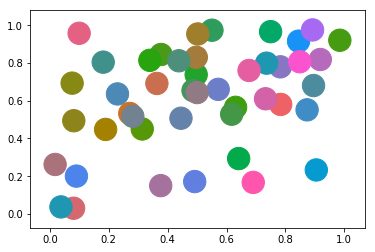

In [7]:
plt.scatter(np.random.random(len(rando_colors)), np.random.random(len(rando_colors)), c=rando_colors, s=500)

# Content

In [8]:
line01 = 'I look even'
line02 = 'better'
line03 = 'in'
line04 = 'grayscale'
lines = [line01, line02, line03, line04]

In [9]:
# content layout
nchars = sum([len(chars) for chars in lines])
sizes = [45, 100, 50, 60]
ys = [0.10, 0.275, 0.55, 0.700]
widths = [1.0, 1.0, 0.15, 1.0]
center = [0, 0, 0.4, 0]

# Test plot with greyscale for comparison

(0.0, 1.0, 0.0, 1.0)

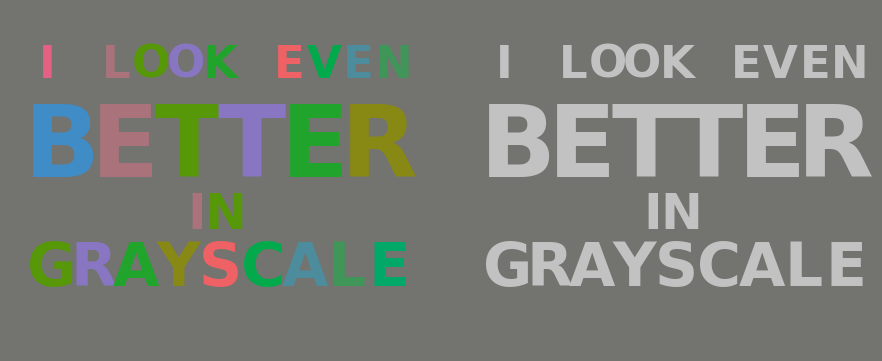

In [10]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['Tahoma']
from matplotlib.font_manager import FontProperties


font = FontProperties() 
font.set_weight('heavy')
facecolor = '#73746f' #'#6a7087' #'#3a445a', #73746f from spreadshirt or 'white'


fig, axs = plt.subplots(figsize = (15,6), ncols=2)
for j, (lin, siz, y, w, cent) in enumerate(zip(lines, sizes, ys, widths, center)):
    length = len(lin)
    
    for i, char in enumerate(lin):
        axs[0].text(x = w*(i+0.5)/length + cent, y= 1-y, s=char.upper(), size=font.set_size(siz), 
                    ha='center', va='top', 
                    color = np.array(rando_colors[i+j]),
                    fontproperties=font)
        
        if True:
            axs[1].text(x = w*(i+0.5)/length +cent, y= 1-y, s=char.upper(), size=siz, 
                        ha='center', va='top', 
                        color = randogreys[i+j],
                        fontproperties=font)

fig.patch.set_facecolor(facecolor)
axs[0].axis('off')
axs[1].axis('off')

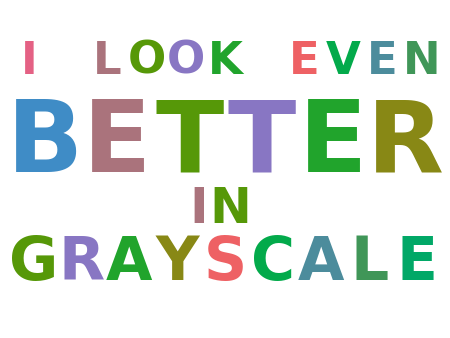

In [22]:
import matplotlib as mpl
fig, ax = plt.subplots(figsize = (8,6), ncols=1)
for j, (lin, siz, y, w, cent) in enumerate(zip(lines, sizes, ys, widths, center)):
    length = len(lin)
    
    for i, char in enumerate(lin):
        ax.text(x = w*(i+0.5)/length + cent, y= 1-y, s=char.upper(), size=font.set_size(siz), 
                    ha='center', va='top', 
                    color = np.array(rando_colors[i+j]),
                    fontproperties=font)
        
    
pos = ax.get_position()
ax.set_position([0.1, 0.1, 0.75, 0.75])
fig.patch.set_facecolor((1,1,1,0))
ax.set_yticks([])
ax.set_xticks([])
ax.axis('off')
mpl.rcParams['savefig.facecolor'] = (0,0,0,0) 
fig.savefig('grayoutput.png', dpi=300)

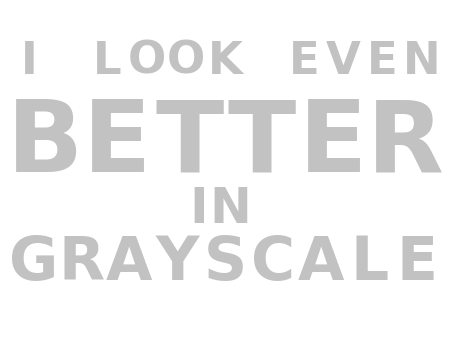

In [23]:
import matplotlib as mpl
fig, ax = plt.subplots(figsize = (8,6), ncols=1)
for j, (lin, siz, y, w, cent) in enumerate(zip(lines, sizes, ys, widths, center)):
    length = len(lin)
    
    for i, char in enumerate(lin):
        ax.text(x = w*(i+0.5)/length + cent, y= 1-y, s=char.upper(), size=font.set_size(siz), 
                    ha='center', va='top', 
                    color = randogreys[i+j],
                    fontproperties=font)
        
    
pos = ax.get_position()
ax.set_position([0.1, 0.1, 0.75, 0.75])
fig.patch.set_facecolor((1,1,1,0))
ax.set_yticks([])
ax.set_xticks([])
ax.axis('off')
mpl.rcParams['savefig.facecolor'] = (0,0,0,0) 
fig.savefig('grayoutput.png', dpi=300)